In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\Project - 16th Dec\\Health Care\\ECG'

In [2]:
dataset_path = 'C:\\Users\\Lenovo\\Desktop\\Project - 16th Dec\\Health Care\\ECG'

In [3]:
abnormal_heartbeat_image = len(os.listdir(os.path.join(dataset_path, "Abnormal_HeartBeat")))
covid_19_image = len(os.listdir(os.path.join(dataset_path, "Covid_19")))
mi_image = len(os.listdir(os.path.join(dataset_path, "MI")))
mi_history_image = len(os.listdir(os.path.join(dataset_path, "MI_History")))
normal_image = len(os.listdir(os.path.join(dataset_path, "Normal")))

In [4]:
print("Abnormal heart beat :",abnormal_heartbeat_image)
print("Covid 19 :",covid_19_image)
print("MI :",mi_image)
print("MI History :",mi_history_image)
print("Normal :",normal_image)

Abnormal heart beat : 546
Covid 19 : 250
MI : 74
MI History : 203
Normal : 859


In [5]:
546+250+74+203+859

1932

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [7]:
labels = ["Abnormal HeartBeat","Covid 19","MI","Previous MI History","Normal"]
counts = [abnormal_heartbeat_image, covid_19_image, mi_image,mi_history_image, normal_image]

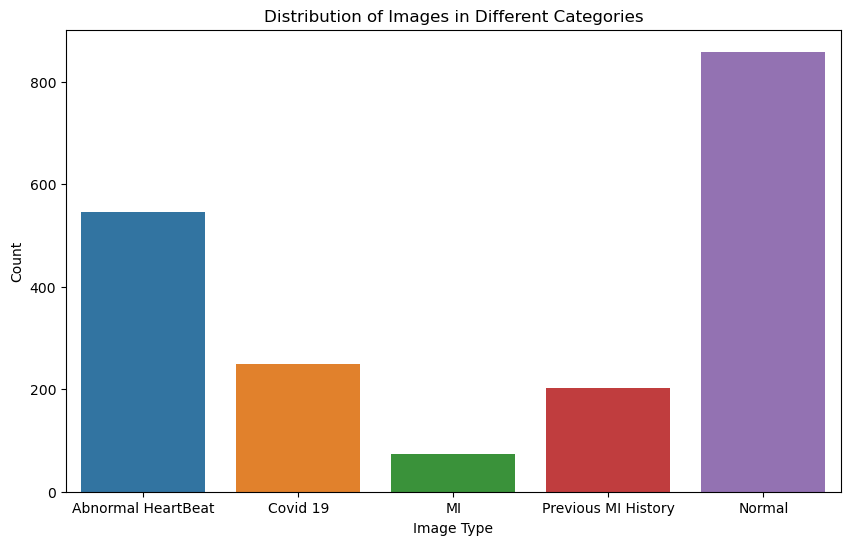

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=counts)
plt.xlabel("Image Type")
plt.ylabel("Count")
plt.title("Distribution of Images in Different Categories")
plt.show()

In [9]:
fig = px.bar(x=labels, y=counts)
fig.update_layout(xaxis_title = "Image Type", yaxis_title="Count", 
                  title ="Distribution of Images in Different Categories", width=800, height=500)
fig.show()

In [10]:
fig = go.Figure(data=[go.Pie(labels=labels, values=counts,
                            textinfo="percent", insidetextorientation='radial')])
fig.update_layout(title="Distribution of Images in Different Categories", width=800, height=500)
fig.show()

In [11]:
abnormal_heartbeat_path = os.path.join(dataset_path, "Abnormal_HeartBeat")
covid_19_path = os.path.join(dataset_path, "Covid_19")
mi_path = os.path.join(dataset_path, "MI")
mi_history_path = os.path.join(dataset_path, "MI_History")
normal_path = os.path.join(dataset_path, "Normal")

In [12]:
# computer vision (cv2)
# !pip install opencv-python
import cv2

In [13]:
abnormal_heartbeat_files = os.listdir(abnormal_heartbeat_path)
covid_19_files = os.listdir(covid_19_path)
mi_files = os.listdir(mi_path)
mi_history_files = os.listdir(mi_history_path)
normal_files = os.listdir(normal_path)

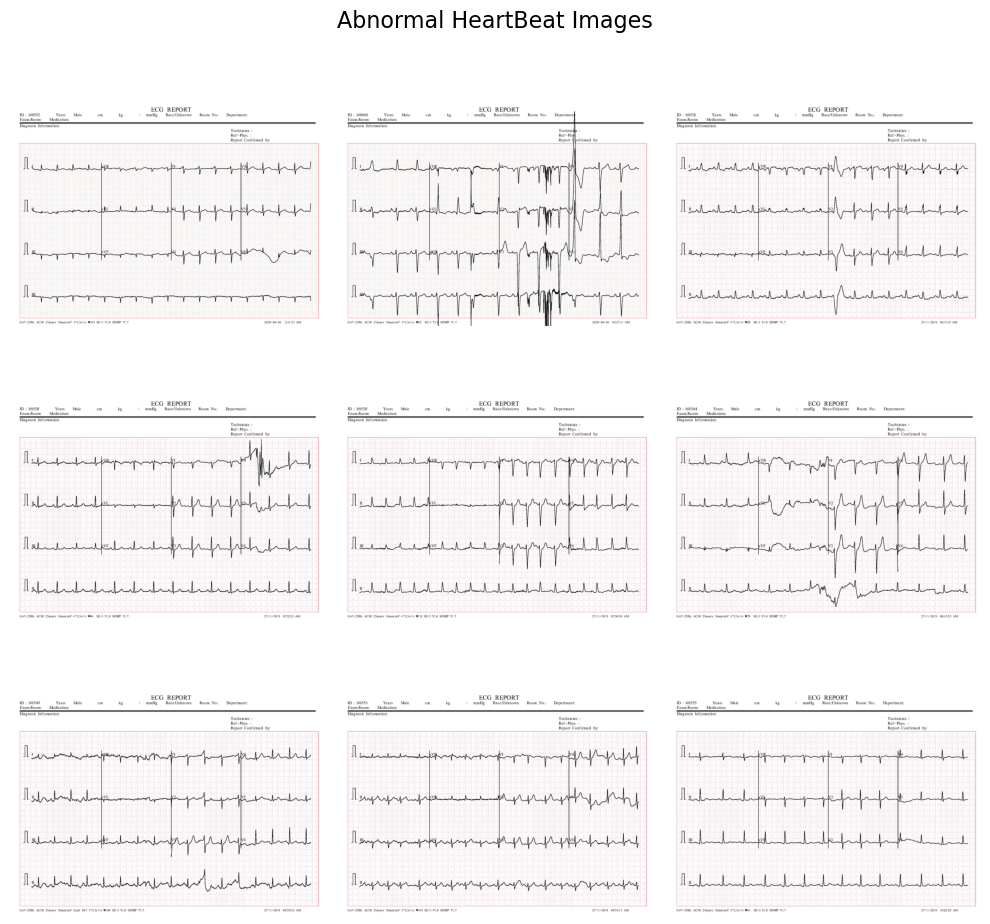

In [14]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
fig.suptitle("Abnormal HeartBeat Images", fontsize=16)
axes=axes.ravel()

for i, image_file in enumerate(abnormal_heartbeat_files[:9]):
    image_path = os.path.join(abnormal_heartbeat_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

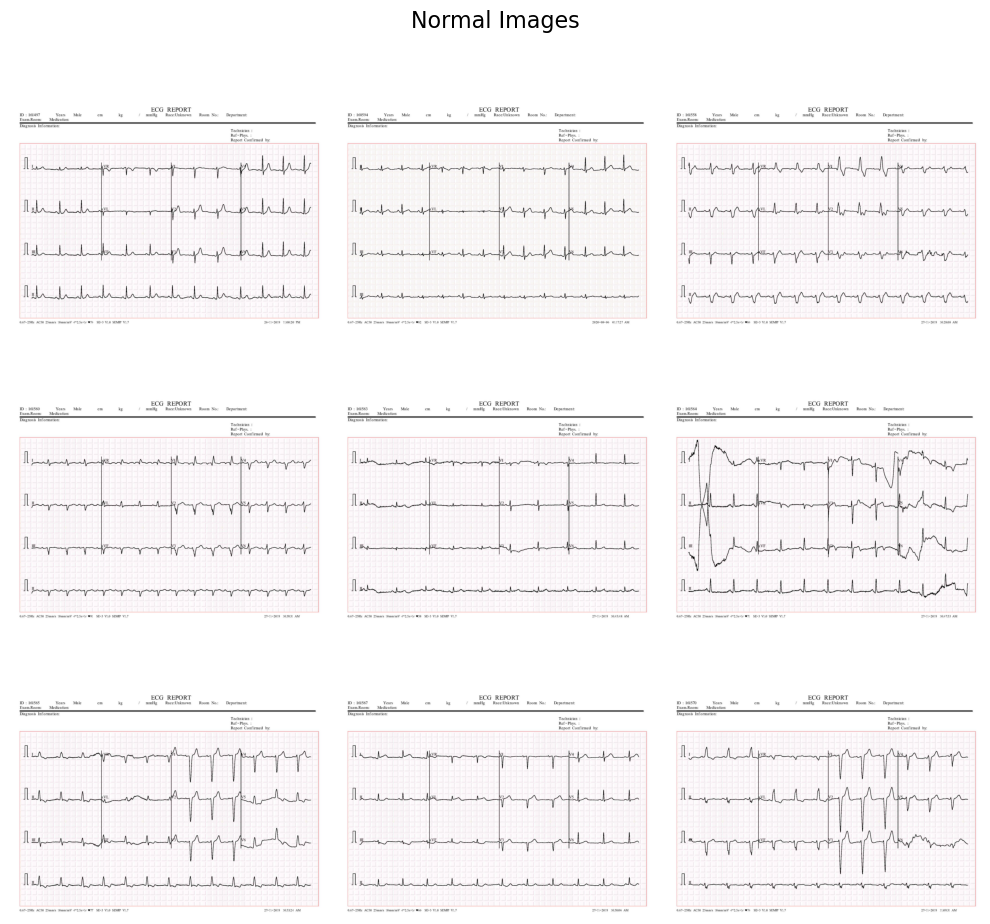

In [15]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
fig.suptitle("Normal Images", fontsize=16)
axes=axes.ravel()

for i, image_file in enumerate(normal_files[:9]):
    image_path = os.path.join(normal_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

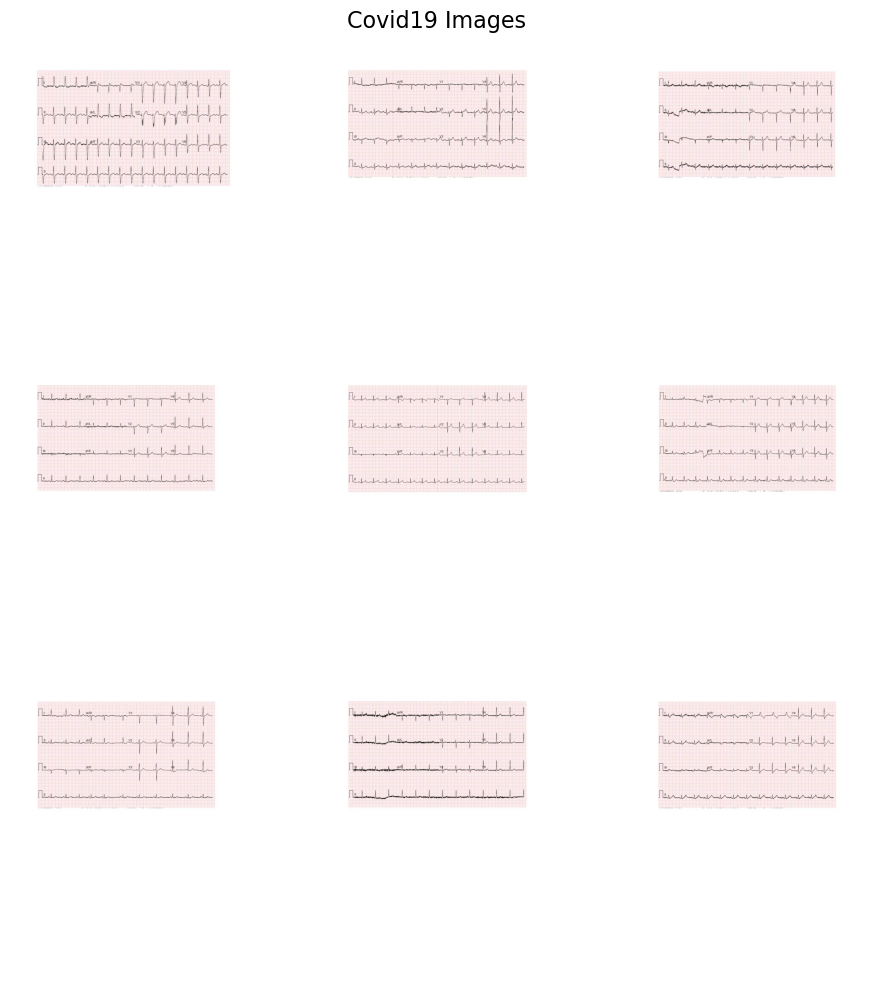

In [16]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
fig.suptitle("Covid19 Images", fontsize=16)
axes=axes.ravel()

for i, image_file in enumerate(covid_19_files[:9]):
    image_path = os.path.join(covid_19_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [17]:
# since it's image data, hence we have to ensure all images have same pixel size
# so resizing the image by 128*128 
def load_and_preprocess_image(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    
    for image_file in image_files :
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (128,128))
            images.append(image)
    return images

In [18]:
abnormal_heartbeat_path = os.path.join(dataset_path, "Abnormal_HeartBeat")
covid_19_path = os.path.join(dataset_path, "Covid_19")
mi_path = os.path.join(dataset_path, "MI")
mi_history_path = os.path.join(dataset_path, "MI_History")
normal_path = os.path.join(dataset_path, "Normal")

In [19]:
abnormal_heartbeat_files = load_and_preprocess_image(abnormal_heartbeat_path)
covid_19_files = load_and_preprocess_image(covid_19_path)
mi_files = load_and_preprocess_image(mi_path)
mi_history_files = load_and_preprocess_image(mi_history_path)
normal_files = load_and_preprocess_image(normal_path)

In [20]:
import numpy as np

In [21]:
abnormal_heartbeat_files = np.array(abnormal_heartbeat_files).reshape(-1, 128, 128, 3)
covid_19_files = np.array(covid_19_files).reshape(-1, 128, 128, 3)
mi_files = np.array(mi_files).reshape(-1, 128, 128, 3)
mi_history_files = np.array(mi_history_files).reshape(-1, 128, 128, 3)
normal_files = np.array(normal_files).reshape(-1, 128, 128, 3)

In [22]:
all_files = np.concatenate((abnormal_heartbeat_files, covid_19_files, mi_files,mi_history_files,
                           normal_files), axis=0)

all_labels = np.concatenate((
np.zeros(len(abnormal_heartbeat_files)),
np.ones(len(covid_19_files)),
np.ones(len(mi_files)) * 2,
    np.ones(len(mi_history_files)) * 3,
    np.ones(len(normal_files))*4
))

In [23]:
len(all_files)

1932

In [24]:
all_labels

array([0., 0., 0., ..., 4., 4., 4.])

In [25]:
# Imabalance treatment
# Feature scaling
# Machine Learning
# Deep Learning
# Transfer Learning
# Auto ML

In [26]:
all_files_flat = all_files.reshape(-1, all_files.shape[1]*all_files.shape[2]*all_files.shape[3])

In [28]:
all_files_flat.shape

(1932, 49152)

# Imbalance treatment

In [36]:
from imblearn.over_sampling import SMOTE
ros = SMOTE()
all_files_flat_resampled, all_labels_resampled = ros.fit_resample(all_files_flat, all_labels)

In [37]:
unique_resampled, counts_resampled = np.unique(all_labels_resampled, return_counts=True)
class_counts_resampled = dict(zip(unique_resampled, counts_resampled))

print("New Class Distribution after resampling :", class_counts_resampled)

New Class Distribution after resampling : {0.0: 859, 1.0: 859, 2.0: 859, 3.0: 859, 4.0: 859}


# Feature Scaling 

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(all_files_flat_resampled,all_labels_resampled,
                                                   test_size=0.2, stratify=all_labels_resampled,
                                                   random_state=101)

In [40]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3436, 49152) (859, 49152) (3436,) (859,)


In [41]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [46]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [47]:
y_pred_train = rf.predict(x_train_scaled)
y_pred_test = rf.predict(x_test_scaled)

In [48]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("="*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.9985448195576252
Test Accuracy : 0.8218859138533178


In [50]:
from sklearn.model_selection import cross_val_score
test_result = cross_val_score(rf, x_test_scaled, y_test, cv=10)
print("Max Accuracy :", test_result.max())
print("Mean Accuracy :", test_result.mean())

Max Accuracy : 0.7790697674418605
Mean Accuracy : 0.7275649794801642


In [51]:
print("Training Accuracy :", classification_report(y_train, y_pred_train))
print("="*10)
print("Test Accuracy :", classification_report(y_test, y_pred_test))

Training Accuracy :               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       688
         1.0       1.00      1.00      1.00       687
         2.0       1.00      1.00      1.00       687
         3.0       0.99      1.00      1.00       687
         4.0       1.00      1.00      1.00       687

    accuracy                           1.00      3436
   macro avg       1.00      1.00      1.00      3436
weighted avg       1.00      1.00      1.00      3436

Test Accuracy :               precision    recall  f1-score   support

         0.0       0.66      0.64      0.65       171
         1.0       1.00      0.98      0.99       172
         2.0       0.94      0.88      0.91       172
         3.0       0.85      0.78      0.81       172
         4.0       0.69      0.83      0.75       172

    accuracy                           0.82       859
   macro avg       0.83      0.82      0.82       859
weighted avg       0.83      0.82      0.

In [52]:
import scikitplot as skplt

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

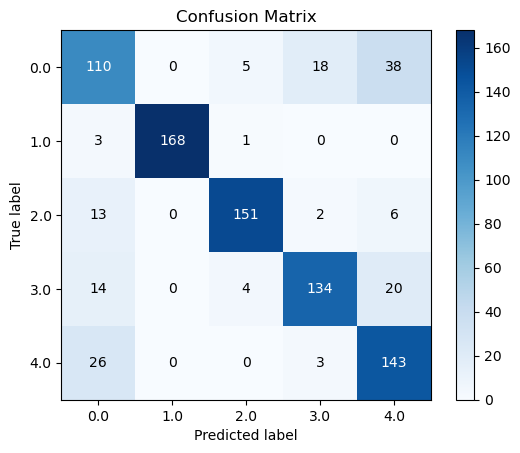

In [53]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)

In [54]:
xgboost = XGBClassifier(n_estimators=10, random_state=42)
xgboost.fit(x_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [55]:
y_pred_train_xgb = xgboost.predict(x_train_scaled)
y_pred_test_xgb = xgboost.predict(x_test_scaled)

In [56]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train_xgb))
print("="*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_xgb))

Training Accuracy : 0.9813736903376019
Test Accuracy : 0.8777648428405123


In [57]:
from sklearn.model_selection import cross_val_score
test_result = cross_val_score(xgboost, x_train_scaled, y_train, cv=10)
print("Max Accuracy :", test_result.max())
print("Mean Accuracy :", test_result.mean())

Max Accuracy : 0.8982558139534884
Mean Accuracy : 0.8774671164146721


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_scaled, y_train)

In [ ]:
y_pred_train_dt = dtree.predict(x_train_scaled)
y_pred_test_dt = dtree.predict(x_test_scaled)

In [ ]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train_dt))
print("="*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_dt))

In [ ]:
plt.figure(figsize=(8,6))
classifier = ["RandomForest","XGBoost","DicisionTree"]
accuracy = [0.82, 0.87, ]
plt.bar(classifier, accuracy, color=['blue','red','green'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision - RF vs XGB vs DT")
plt.ylim(0,1)
plt.show()